In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data1 = pd.read_csv('/content/drive/MyDrive/Portfolio Optimization/data7_data.csv')
data2 = pd.read_csv('/content/drive/MyDrive/Portfolio Optimization/data8_data.csv')
data3 = pd.read_csv('/content/drive/MyDrive/Portfolio Optimization/data9_data.csv')
data4 = pd.read_csv('/content/drive/MyDrive/Portfolio Optimization/data10_data.csv')
data5 = pd.read_csv('/content/drive/MyDrive/Portfolio Optimization/data11_data.csv')
data6 = pd.read_csv('/content/drive/MyDrive/Portfolio Optimization/data12_data.csv')

In [ ]:
print(len(data1))
print(len(data2))
print(len(data3))
print(len(data4))
print(len(data5))
print(len(data6))

8308
8308
8308
8308
8308
8308


In [ ]:
data6

,Open,Close,High,Low,Typical Price,Volume,VWAP,adl,cmf,stochastic_d,...,day,month,Open_mean_lag3,Open_std_lag7,High_mean_lag3,High_std_lag7,Low_mean_lag3,Low_std_lag7,VWAP_mean_lag3,VWAP_std_lag7
0,0.422495,0.413569,0.425471,0.410594,0.416545,47880000,0.383754,1.253389e+09,19.663320,38.135315,...,13,3,0.424479,0.006871,0.430430,0.006056,0.420016,0.006677,0.382859,0.001113
1,0.410594,0.423983,0.425471,0.407619,0.419025,30000000,0.384011,1.278390e+09,20.401853,32.830746,...,16,3,0.425471,0.006871,0.428446,0.006589,0.417041,0.007730,0.383319,0.000996
2,0.425471,0.452249,0.452249,0.422495,0.442331,49920000,0.384710,1.328310e+09,21.179715,38.474274,...,17,3,0.419520,0.008365,0.425471,0.004815,0.411090,0.007310,0.383710,0.000954
3,0.455224,0.455224,0.464150,0.452249,0.457208,102240000,0.386447,1.277187e+09,20.784165,53.370425,...,18,3,0.419520,0.006295,0.434397,0.009630,0.413570,0.006755,0.384158,0.000981
4,0.455224,0.476051,0.476051,0.455224,0.469109,79680000,0.387963,1.356867e+09,20.693894,72.092953,...,19,3,0.430430,0.013834,0.447290,0.015310,0.427455,0.014823,0.385056,0.001349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8303,55.954690,56.090919,57.008211,55.691309,56.263480,26903100,11.664016,9.670907e+09,482.689654,37.914869,...,24,2,60.126392,0.746842,60.468483,0.868069,58.966915,1.104048,11.659280,0.003578
8304,56.299813,54.247261,56.563191,54.002044,54.937499,34495700,11.667125,9.643017e+09,478.151754,22.003759,...,25,2,58.679314,1.848344,59.127360,1.646027,57.495613,1.782910,11.661673,0.004085
8305,54.592373,54.174599,55.237200,53.829479,54.413759,26190100,11.669457,9.629669e+09,483.616575,13.324589,...,26,2,57.150497,2.209401,57.610657,2.059812,55.951664,2.468889,11.664220,0.004725
8306,52.612485,50.705250,53.139244,50.678001,51.507498,42226900,11.672959,9.588377e+09,455.854492,7.942485,...,27,2,55.615627,2.573314,56.269535,2.397308,54.507610,2.652446,11.666866,0.005197


In [ ]:
window_size = 50   # no.of (days) samples of historic data given as one sample for LSTMs 
period = 252       # no.of days to be considered for selling and return

In [ ]:
data1['return'] =  (data1['Close'] - data1['Open'])/data1['Open']
data2['return'] =  (data2['Close'] - data2['Open'])/data1['Open']
data3['return'] =  (data3['Close'] - data3['Open'])/data1['Open']
data4['return'] =  (data4['Close'] - data4['Open'])/data1['Open']
data5['return'] =  (data5['Close'] - data5['Open'])/data1['Open']
data6['return'] =  (data6['Close'] - data6['Open'])/data1['Open']

In [ ]:
data5

,Open,Close,High,Low,Typical Price,Volume,VWAP,adl,cmf,stochastic_d,...,month,Open_mean_lag3,Open_std_lag7,High_mean_lag3,High_std_lag7,Low_mean_lag3,Low_std_lag7,VWAP_mean_lag3,VWAP_std_lag7,return
0,2.386530,2.373198,2.399863,2.373198,2.382086,970413,2.311588,1.611687e+07,7.364827,68.174861,...,3,2.433194,0.058461,2.462081,0.046094,2.399862,0.044171,2.308346,0.005594,-0.005322
1,2.346532,2.386529,2.386529,2.319866,2.364308,2276739,2.312480,1.839361e+07,7.726688,60.754429,...,3,2.430972,0.043955,2.435416,0.034791,2.393196,0.033741,2.310751,0.005755,0.016251
2,2.379865,2.419862,2.433195,2.366531,2.406529,1068262,2.313221,1.903456e+07,8.118698,58.710827,...,3,2.390974,0.040706,2.408751,0.034791,2.359865,0.035215,2.311711,0.005509,0.016607
3,2.433193,2.439859,2.466524,2.406528,2.437637,1234705,2.314345,1.917174e+07,8.833169,63.244431,...,3,2.370976,0.039971,2.406529,0.034147,2.353198,0.034608,2.312430,0.004708,0.002718
4,2.433193,2.539854,2.553186,2.433193,2.508744,3792884,2.319590,2.212176e+07,8.610178,72.475985,...,3,2.386530,0.041453,2.428749,0.035364,2.364308,0.032528,2.313349,0.003280,0.043492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8303,164.330640,163.171402,165.639446,162.573089,163.794646,2084100,33.658240,1.108701e+09,488.204875,67.782136,...,2,168.578080,1.234978,169.497360,0.601356,167.041780,1.272320,33.622932,0.028758,-0.008702
8304,163.274248,156.290802,164.059546,156.029041,158.793130,2606400,33.675850,1.106264e+09,477.757569,45.439156,...,2,167.107210,1.878704,168.076350,1.601289,165.081670,2.024148,33.639970,0.031160,-0.053623
8305,157.992259,155.496170,159.675020,155.402678,156.857956,2319700,33.691277,1.104046e+09,470.716412,24.392632,...,2,165.231230,2.470008,166.125600,2.461117,161.466840,4.453032,33.659225,0.034106,-0.019187
8306,153.374002,147.269333,155.159598,147.203900,149.877610,2843300,33.709109,1.101250e+09,480.761824,12.649467,...,2,161.865720,4.224021,163.124660,3.993084,158.001600,5.533691,33.675120,0.036131,-0.047267


In [ ]:
y1 = data1['return']
y2 = data2['return']
y3 = data3['return']
y4 = data4['return']
y5 = data5['return']
y6 = data6['return']

In [ ]:
data1.head()

,Open,Close,High,Low,Typical Price,Volume,VWAP,adl,cmf,stochastic_d,...,month,Open_mean_lag3,Open_std_lag7,High_mean_lag3,High_std_lag7,Low_mean_lag3,Low_std_lag7,VWAP_mean_lag3,VWAP_std_lag7,return
0,2.505158,2.461207,2.505158,2.461207,2.475857,2821800,2.195887,4.583798e+07,7.210091,87.435832,...,3,2.464135,0.068256,2.505155,0.043328,2.431905,0.053016,2.187880,0.012434,-0.017544
1,2.461207,2.408467,2.461207,2.382097,2.417257,2842800,2.197929,4.489038e+07,7.618917,79.973402,...,3,2.502226,0.050291,2.508086,0.027348,2.458276,0.040794,2.192765,0.011082,-0.021429
2,2.408466,2.443627,2.443627,2.399676,2.428977,3595200,2.200593,4.848558e+07,7.965401,72.789844,...,3,2.490507,0.050312,2.493437,0.028084,2.437767,0.040458,2.195698,0.010141,0.014599
3,2.452417,2.443627,2.478787,2.408466,2.443627,5527200,2.204827,4.848561e+07,8.196399,67.875146,...,3,2.458277,0.053330,2.469997,0.030750,2.414327,0.041050,2.198137,0.009200,-0.003584
4,2.452417,2.443627,2.452417,2.399676,2.431907,2859600,2.206855,5.039202e+07,8.639907,68.063510,...,3,2.440697,0.046354,2.461207,0.026089,2.396746,0.036896,2.201117,0.007783,-0.003584


In [ ]:
y = pd.concat([y1,y2,y3,y4,y5,y6],axis = 1)
y

,return,return,return,return,return,return
0,-0.017544,-0.002423,-0.011698,0.032209,-0.005322,-0.003563
1,-0.021429,0.002466,0.007144,0.017883,0.016251,0.005440
2,0.014599,0.002160,0.023119,-0.018274,0.016607,0.011118
3,-0.003584,-0.001768,-0.000598,-0.016451,0.002718,0.000000
4,-0.003584,0.003713,0.011950,0.002991,0.043492,0.008492
...,...,...,...,...,...,...
8303,-0.022076,0.001693,-0.017808,0.015163,-0.008702,0.001023
8304,-0.010449,-0.024224,-0.032038,-0.101358,-0.053623,-0.015761
8305,-0.003229,0.011531,-0.003548,0.014912,-0.019187,-0.003211
8306,-0.035641,-0.014386,-0.023014,-0.019202,-0.047267,-0.014767


In [ ]:
data = pd.concat([data1,data2,data3,data4,data5,data6],axis = 1)
data

,Open,Close,High,Low,Typical Price,Volume,VWAP,adl,cmf,stochastic_d,...,month,Open_mean_lag3,Open_std_lag7,High_mean_lag3,High_std_lag7,Low_mean_lag3,Low_std_lag7,VWAP_mean_lag3,VWAP_std_lag7,return
0,2.505158,2.461207,2.505158,2.461207,2.475857,2821800,2.195887,4.583798e+07,7.210091,87.435832,...,3,0.424479,0.006871,0.430430,0.006056,0.420016,0.006677,0.382859,0.001113,-0.003563
1,2.461207,2.408467,2.461207,2.382097,2.417257,2842800,2.197929,4.489038e+07,7.618917,79.973402,...,3,0.425471,0.006871,0.428446,0.006589,0.417041,0.007730,0.383319,0.000996,0.005440
2,2.408466,2.443627,2.443627,2.399676,2.428977,3595200,2.200593,4.848558e+07,7.965401,72.789844,...,3,0.419520,0.008365,0.425471,0.004815,0.411090,0.007310,0.383710,0.000954,0.011118
3,2.452417,2.443627,2.478787,2.408466,2.443627,5527200,2.204827,4.848561e+07,8.196399,67.875146,...,3,0.419520,0.006295,0.434397,0.009630,0.413570,0.006755,0.384158,0.000981,0.000000
4,2.452417,2.443627,2.452417,2.399676,2.431907,2859600,2.206855,5.039202e+07,8.639907,68.063510,...,3,0.430430,0.013834,0.447290,0.015310,0.427455,0.014823,0.385056,0.001349,0.008492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8303,133.217892,130.276978,134.396078,130.203910,131.625655,5027700,39.062313,2.040980e+09,529.733913,61.523529,...,2,60.126392,0.746842,60.468483,0.868069,58.966915,1.104048,11.659280,0.003578,0.001023
8304,130.231270,128.870422,131.866133,128.386360,129.707639,7585800,39.080046,2.035505e+09,505.499751,46.327766,...,2,58.679314,1.848344,59.127360,1.646027,57.495613,1.782910,11.661673,0.004085,-0.015761
8305,130.094285,129.674149,131.290741,128.925228,129.963372,6157200,39.094474,2.033246e+09,485.892903,29.805459,...,2,57.150497,2.209401,57.610657,2.059812,55.951664,2.468889,11.664220,0.004725,-0.003211
8306,129.153576,124.550400,130.733628,124.495602,126.593210,8605000,39.113883,2.024792e+09,456.697613,19.871362,...,2,55.615627,2.573314,56.269535,2.397308,54.507610,2.652446,11.666866,0.005197,-0.014767


In [ ]:
data = data.values

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler().fit(data)
data = sc.transform(data)

In [ ]:
data.shape

(8308, 198)

In [ ]:
y = y.values

In [ ]:
y.shape

(8308, 6)

In [ ]:
X = []
for i in range(len(data)-window_size):
  X.append(data[i:i+window_size,:])

In [ ]:
X = np.array(X)

In [ ]:
X.shape

(8258, 50, 198)

In [ ]:
y_ = y[window_size:,:]
y_.shape

(8258, 6)

In [ ]:
Y = []
for i in range(len(y_)-period):
  Y.append(y_[i:i+period,:])

In [ ]:
Y = np.array(Y)
Y.shape

(8006, 252, 6)

In [ ]:
X = X[:-period,:]
X.shape

(8006, 50, 198)

In [ ]:
X_train = X[:-252*3,:,:]
X_test = X[-252*3:,:,:]
y_train = Y[:-252*3,:,:]
y_test = Y[-252*3:,:,:]

In [ ]:
# from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test = train_test_split(X,Y,shuffle = False,random_state = 34,test_size = 0.3)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(7250, 50, 198)
(7250, 252, 6)


In [ ]:
input_size = int(X_train.shape[2]/6)
input_size

33

In [ ]:
input1 = X_train[:,:,:input_size]
input2 = X_train[:,:,input_size:2*input_size]
input3 = X_train[:,:,2*input_size:3*input_size]
input4 = X_train[:,:,3*input_size:4*input_size]
input5 = X_train[:,:,4*input_size:5*input_size]
input6 = X_train[:,:,5*input_size:6*input_size]
output = y_train

In [ ]:
input1.shape

(7250, 50, 33)

In [ ]:
test_input1 = X_test[:,:,:input_size]
test_input2 = X_test[:,:,1*input_size:2*input_size]
test_input3 = X_test[:,:,2*input_size:3*input_size]
test_input4 = X_test[:,:,3*input_size:4*input_size]
test_input5 = X_test[:,:,4*input_size:5*input_size]
test_input6 = X_test[:,:,5*input_size:6*input_size]

In [ ]:
test_input1.shape

(756, 50, 33)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,Input,BatchNormalization,Dropout, LSTM
from keras.models import Sequential

In [ ]:
input_size = input1.shape[1:]

In [ ]:
input_size

(50, 33)

In [ ]:
def single_model(input):
  x = LSTM(units =128,return_sequences=True,activation = 'tanh')(input)
  #x = LSTM(units =128,return_sequences=True,activation = 'tanh')(x)
  #x = Dropout(0.2)(x)
  x = BatchNormalization()(x)
  
  x = LSTM(units=64,return_sequences=True,activation = 'tanh')(x)
  x = LSTM(units=64,return_sequences=True,activation = 'tanh')(x)
  x = Dropout(0.2)(x)
  x = BatchNormalization()(x)

  x = LSTM(units=32,return_sequences=True,activation = 'tanh')(x)
  x = LSTM(units=32,return_sequences=True,activation = 'tanh')(x)
  #x = Dropout(0.2)(x)
  x = BatchNormalization()(x)

  x = LSTM(units=4,activation = 'tanh',return_sequences = True)(x)
  x = LSTM(units=4,activation = 'tanh')(x)
  #x = Dropout(0.2)(x)
  x = BatchNormalization()(x)

  x = Dense(units=1,activation = 'linear')(x)
  return x

In [ ]:
def create_model():
  input1 = keras.Input(shape = input_size)
  input2 = keras.Input(shape = input_size)
  input3 = keras.Input(shape = input_size)
  input4 = keras.Input(shape = input_size)
  input5 = keras.Input(shape = input_size)
  input6 = keras.Input(shape = input_size)
  x1 = single_model(input1)
  x2 = single_model(input2)
  x3 = single_model(input3)
  x4 = single_model(input4)
  x5 = single_model(input5)
  x6 = single_model(input6)
  y = tf.keras.layers.Concatenate()([x1,x2,x3,x4,x5,x6])
  y = Dense(48,activation = 'linear')(y)
  y = Dropout(0.2)(y)
  y = Dense(24,activation = 'linear')(y)
  y = Dense(12,activation = 'linear')(y)
  y = Dense(6,activation = 'softmax')(y)
  #print(y)
  model = tf.keras.models.Model(inputs = [input1,input2,input3,input4,input5,input6],outputs = [y])
  return model

In [ ]:
model = create_model()
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 50, 33)]     0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 50, 33)]     0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 50, 33)]     0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 50, 33)]     0           []                               
                                                                                              

In [ ]:
from keras.utils import plot_model

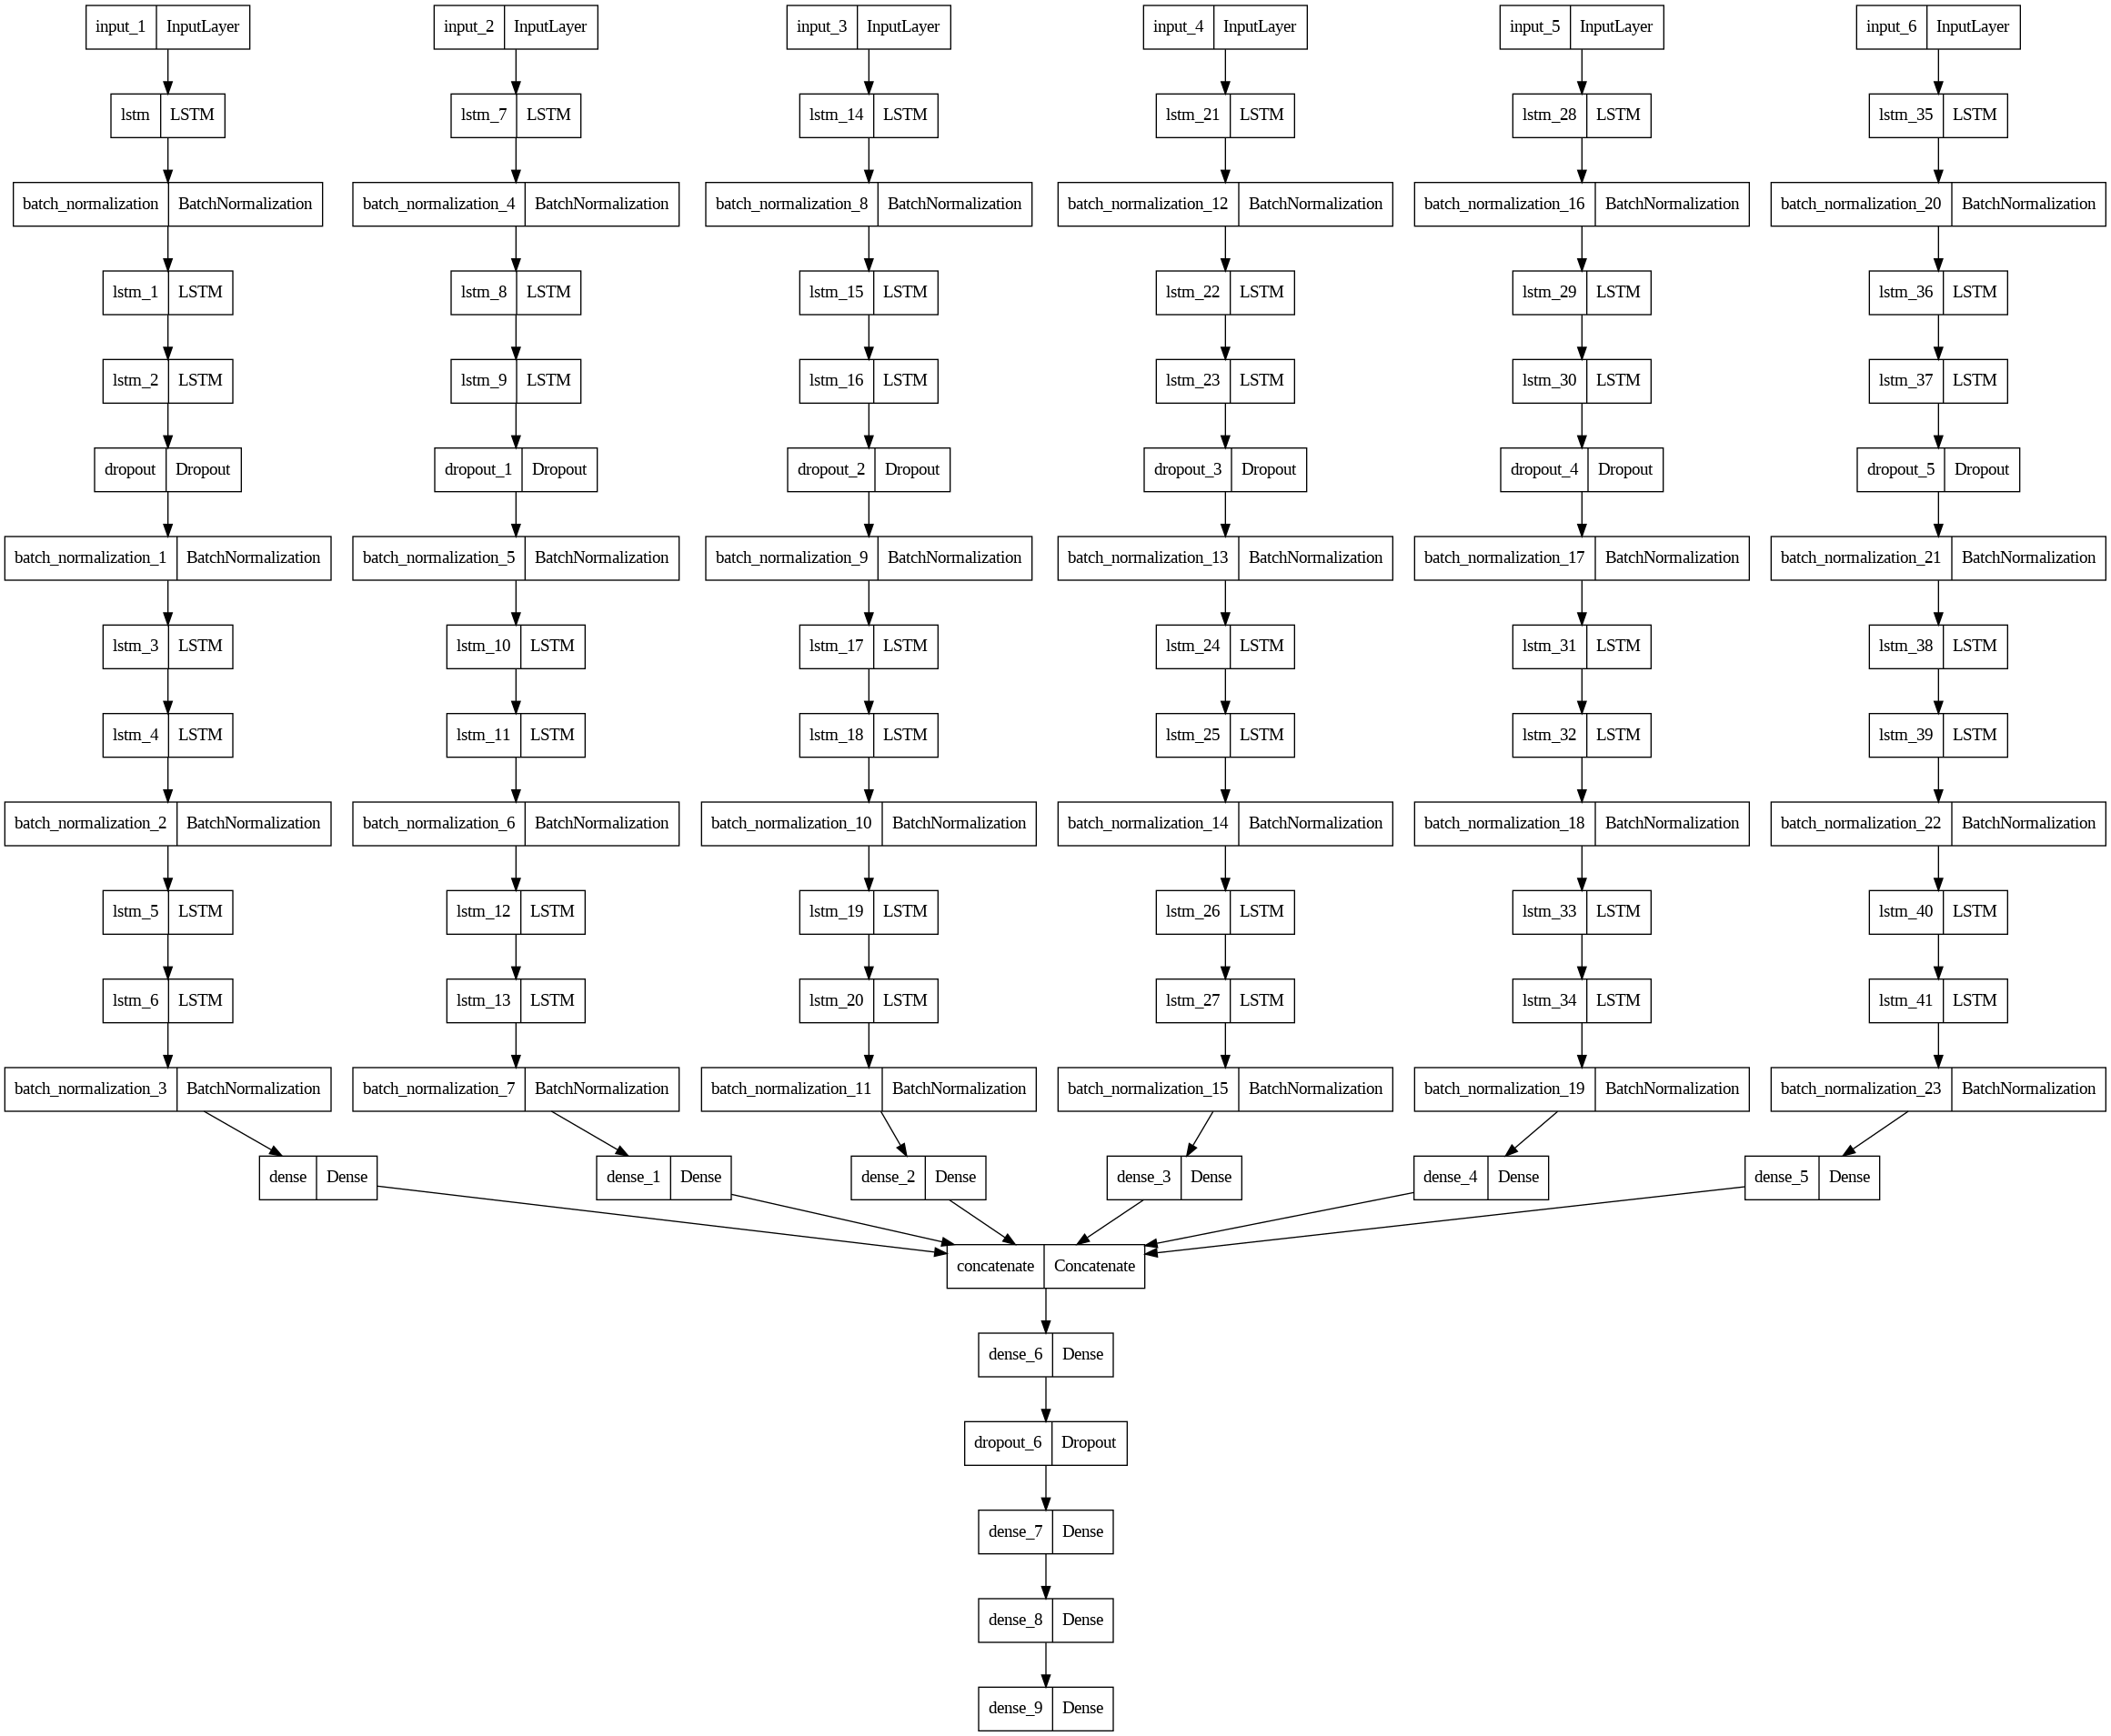

In [ ]:
plot_model(model)

In [ ]:
import tensorflow
from tensorflow import keras
from keras import backend as K

In [ ]:
print(input1.shape)
print(y_train.shape)

(7250, 50, 33)
(7250, 252, 6)


In [ ]:
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
rlr = ReduceLROnPlateau(patience = 20)
mcp = ModelCheckpoint(monitor = 'val_loss',filepath = '/content/drive/MyDrive/Portfolio Optimization/Models/lstm_diverse_more_years_batch_data_changing_layers.h5',save_best_only = True)

In [ ]:
def annual_mean_sharpe_ratio(y_true,y_pred):
  #print(y_pred)
  #print(y_true)
  y_true = tf.cast(y_true,tf.float64)
  y_pred = tf.cast(y_pred,tf.float64)
  y_pred = tf.reshape(y_pred,(-1,1,6))
  r = y_true*y_pred
  returns = K.sum(r,axis = 2)
  mean_return = K.mean(returns,axis = 1)
  std_return = K.std(returns,axis = 1)
  z = K.mean(15.87*mean_return/std_return)
  return K.exp(-z)

In [ ]:
def amsr(y_true,y_pred):
  #print(y_pred)
  y_true = tf.cast(y_true,tf.float64)
  y_pred = tf.cast(y_pred,tf.float64)
  y_pred = tf.reshape(y_pred,(-1,1,6))
  r = y_true*y_pred
  returns = K.sum(r,axis = 2)
  mean_return = K.mean(returns,axis = 1)
  std_return = K.std(returns,axis = 1)
  z = K.mean(15.87*mean_return/std_return)
  return z

In [ ]:
model.compile(optimizer = 'adam',loss = annual_mean_sharpe_ratio, metrics = amsr)

In [ ]:
history = model.fit([input1,input2,input3,input4,input5,input6],
          output,epochs = 100,
          validation_data = ([test_input1,test_input2,test_input3,test_input4,test_input5,test_input6],y_test),
          callbacks = [mcp],batch_size = 16)

Epoch 1/100
 19/454 [>.............................] - ETA: 8:00 - loss: 0.1934 - amsr: 1.7166

In [ ]:
import matplotlib.pyplot as plt

dict_keys(['loss', 'amsr', 'val_loss', 'val_amsr'])


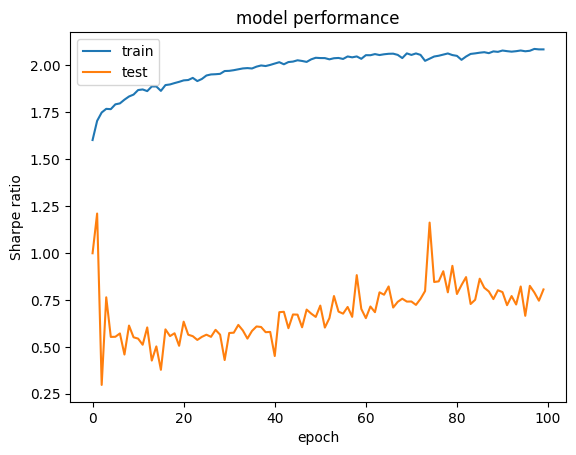

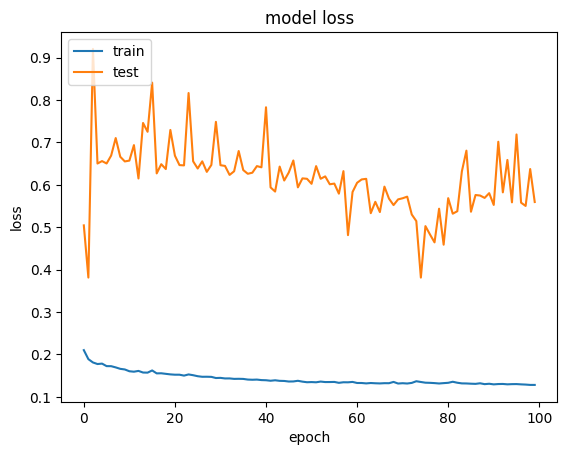

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['amsr'])
plt.plot(history.history['val_amsr'])
plt.title('model performance')
plt.ylabel('Sharpe ratio')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['loss', 'amsr', 'val_loss', 'val_amsr'])


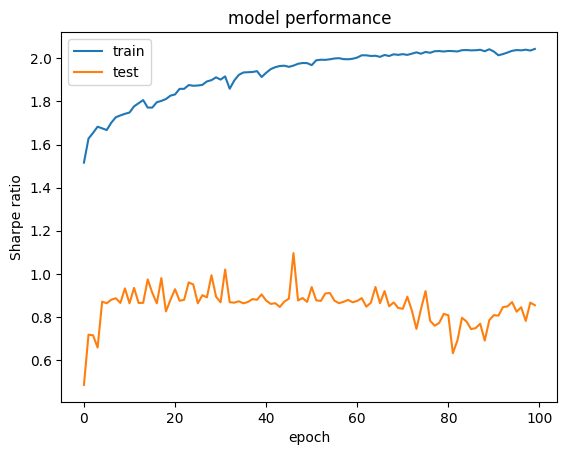

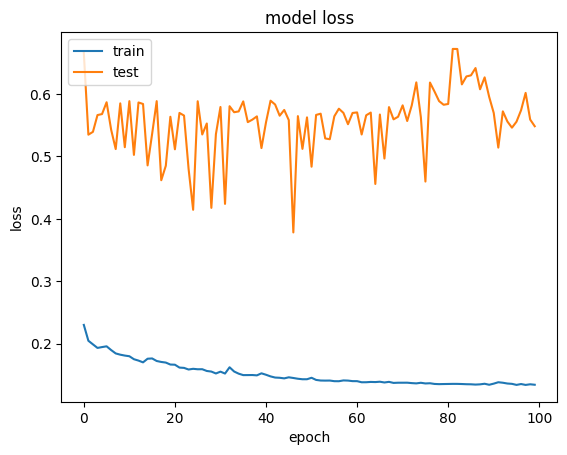

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['amsr'])
plt.plot(history.history['val_amsr'])
plt.title('model performance')
plt.ylabel('Sharpe ratio')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#from keras.models import load_model
model.load_weights(filepath = '/content/drive/MyDrive/Portfolio Optimization/Models/lstm_diverse_more_years_batch_nextof1209.h5')
#model.load_weights(filepath = '/content/drive/MyDrive/Portfolio Optimization/Models/lstm_diverse_12y.h5')

In [ ]:
model.evaluate([input1,input2,input3,input4,input5,input6],output)

241/241 [==============================] - 13s 53ms/step - loss: 0.3198 - amsr: 1.6572


[0.3198264241218567, 1.657164216041565]

In [ ]:
model.evaluate([test_input1,test_input2,test_input3,test_input4,test_input5,test_input6],y_test)

24/24 [==============================] - 2s 72ms/step - loss: 0.3715 - amsr: 1.0908


[0.37150120735168457, 1.0907620191574097]

In [ ]:
model.predict([input1,input2,input3,input4,input5,input6])

241/241 [==============================] - 11s 47ms/step


array([[2.6693431e-01, 4.0696140e-02, 1.4560921e-03, 2.4540442e-01,
        4.4517595e-01, 3.3309322e-04],
       [2.9821399e-01, 4.4684485e-02, 1.3106728e-03, 2.1444248e-01,
        4.4095254e-01, 3.9580403e-04],
       [3.2256940e-01, 3.5625603e-02, 1.3953574e-03, 2.2409911e-01,
        4.1588670e-01, 4.2371801e-04],
       ...,
       [2.2240400e-07, 9.8263562e-01, 3.3804021e-08, 1.1490490e-05,
        1.7350646e-02, 1.9615961e-06],
       [1.8443401e-07, 9.8441350e-01, 2.7735807e-08, 9.7553175e-06,
        1.5574851e-02, 1.6455208e-06],
       [9.1191190e-08, 9.9021435e-01, 1.1711051e-08, 3.7653911e-06,
        9.7810132e-03, 7.1473409e-07]], dtype=float32)